In [1]:
import glob
import json, re, glob,random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
blue1 = '#eff3ff'
blue2 = '#bdd7e7'
blue3 = '#6baed6'
blue4 = '#3182bd'
blue5 = '#08519c'
green1 = '#edf8e9'
green2 = '#bae4b3'
green3 = '#74c476'
green4 = '#31a354'
green5 = '#006d2c'
grey1 = '#f7f7f7'
grey2 = '#cccccc'
grey3 = '#969696'
grey4 = '#636363'
grey5 = '#252525'
purple1 = '#f2f0f7'
purple2 = '#cbc9e2'
purple3 = '#9e9ac8'
purple4 = '#756bb1'
purple5 = '#54278f'

# Import real clone size vectors from Poon et al.

In [3]:
map = {'s0/mu10minus4':0, 's15/mu10minus4':1, 's30/mu10minus4':2,\
              's0/mu10minus5':3, 's15/mu10minus5':4, 's30/mu10minus5':5,\
              's0/mu10minus6':6, 's15/mu10minus6':7, 's30/mu10minus6':8}
colour_list = ['#ffeda0', '#feb24c', '#f03b20', '#e5f5e0', '#a1d99b', '#31a354', '#deebf7', '#9ecae1', '#3182bd']

legend_map = {}
for label, ind in map.items():
    legend_map[label] = colour_list[map[label]]
    
def custom_labelizer(label_tuple, width, height):
    (label, ) =label_tuple
    return (0, 0), colour_list[map[label_tuple]]


In [4]:
Poon_cases = pd.read_csv('dataframes_for_distance_metrics/Poon_unambiguous_cases_clone_size_vectors.csv')

four_hit_linear_Poon = Poon_cases.loc[Poon_cases['k'] == 4]
four_hit_linear_Poon['$f_0$'] = four_hit_linear_Poon['$n_0$']/(four_hit_linear_Poon['total_n'])
four_hit_linear_Poon['$f_1$'] = four_hit_linear_Poon['$n_1$']/(four_hit_linear_Poon['total_n'])
four_hit_linear_Poon['$f_2$'] = four_hit_linear_Poon['$n_2$']/(four_hit_linear_Poon['total_n'])
four_hit_linear_Poon['$f_3$'] = four_hit_linear_Poon['$n_3$']/(four_hit_linear_Poon['total_n'])

three_hit_linear_Poon = Poon_cases.loc[Poon_cases['k'] == 3]
three_hit_linear_Poon['$f_0$'] = three_hit_linear_Poon['$n_0$']/(three_hit_linear_Poon['total_n'])
three_hit_linear_Poon['$f_1$'] = three_hit_linear_Poon['$n_1$']/(three_hit_linear_Poon['total_n'])
three_hit_linear_Poon['$f_2$'] = three_hit_linear_Poon['$n_2$']/(three_hit_linear_Poon['total_n'])



print('k=3', len(three_hit_linear_Poon))
print('k=4', len(four_hit_linear_Poon))

k=3 7
k=4 6


C:\Users\chickchick\AppData\Local\Temp\ipykernel_51044\2827080109.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  four_hit_linear_Poon['$f_0$'] = four_hit_linear_Poon['$n_0$']/(four_hit_linear_Poon['total_n'])
C:\Users\chickchick\AppData\Local\Temp\ipykernel_51044\2827080109.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  four_hit_linear_Poon['$f_1$'] = four_hit_linear_Poon['$n_1$']/(four_hit_linear_Poon['total_n'])
C:\Users\chickchick\AppData\Local\Temp\ipykernel_51044\2827080109.py:6: SettingWithC

2225 [0.4906832298136646, 0.11801242236024845, 0.3695652173913043]
27491 [0.4444444444444444, 0.31746031746031744, 0.0]
4334 [0.0, 0.0, 0.0]
26833R [0.4, 0.0, 0.6]
12565a_v1 [0.9563758389261745, 0.0, 0.0436241610738255]
12565a_v2 [0.9563758389261745, 0.0436241610738255, 0.0]
12565b [0.8125, 0.1875, 0.0]
four_hit_linear_morita
7322 [0.7172995780590717, 0.052742616033755275, 0.0, 0.008438818565400843]
25568 [0.7660485021398002, 0.007132667617689016, 0.2268188302425107, 0.0]
7328 [0.0, 0.0, 0.06836248012718601, 0.1907790143084261]
27510 [0.11363636363636363, 0.0, 0.0, 0.13636363636363635]
2261 [0.5384615384615384, 0.0, 0.38461538461538464, 0.07692307692307693]
47668 [0.6, 0.0, 0.4, 0.0]


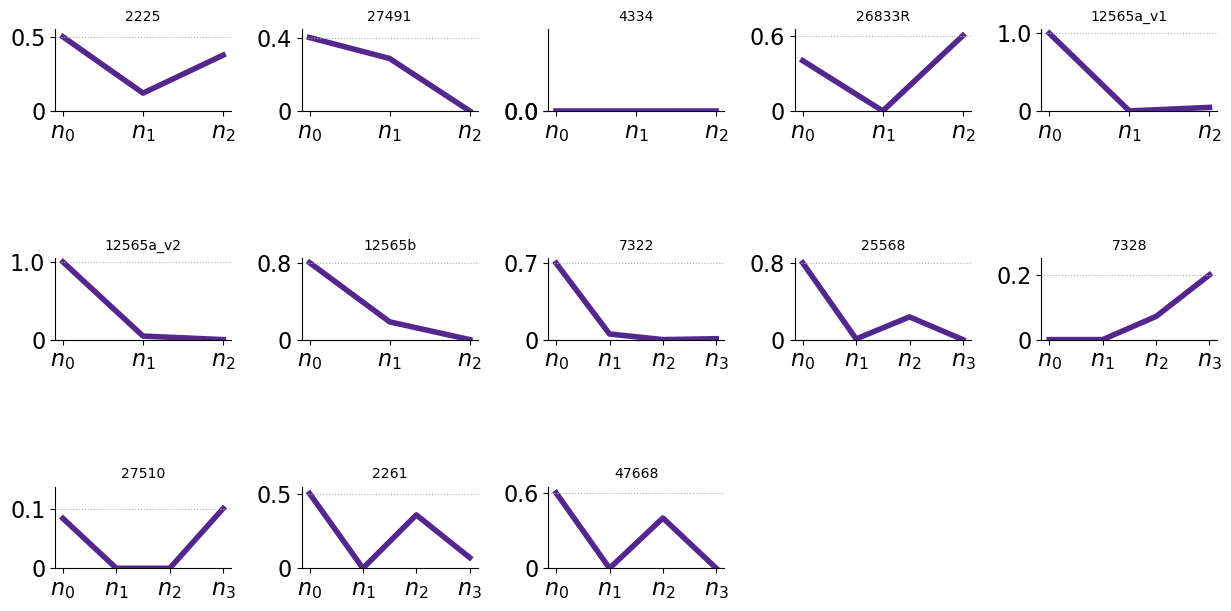

In [14]:
import matplotlib

plt.clf()
plt.close('all')
f, ax = plt.subplots(3,5, figsize=(15,7))

font = {'weight' : 'normal','size'   : 16}
matplotlib.rc('font', **font)
f.subplots_adjust(wspace=0.4)
f.subplots_adjust(hspace=1.8)

total_exp_val = 0
m = 0
n = 0

for index, row in three_hit_linear_Poon.iterrows():
    case_n0 = row['$f_0$']
    case_n1 = row['$f_1$']
    case_n2 = row['$f_2$']
#     case_n3 = row['$n_3$']
    sample_label=row['sample_label']
    real_tree =  [case_n0, case_n1, case_n2]
    print(sample_label, real_tree)
    ax[m][n].plot([0,1,2], real_tree, label=sample_label, color = purple5, zorder = 1, linewidth=4)
    ax[m][n].set_xticks(range(len(real_tree)))
    ax[m][n].set_xticklabels(['$n_0$','$n_1$','$n_2$'])
    ax[m][n].set_ylim(0, max(real_tree)+0.05)
    ax[m][n].set_yticks([0,max(real_tree)])
    ax[m][n].set_yticklabels(['0',round(max(real_tree),1)])
    ax[m][n].set_title(sample_label, fontsize=10)    
    ax[m][n].grid(axis = 'y', which = 'both', zorder = 0, linestyle = ':')
    ax[m][n].spines['top'].set_visible(False)
    ax[m][n].spines['right'].set_visible(False)
    
    n+=1
    if n%5==0:
        m+=1
        n=0



print('four_hit_linear_morita')
for index, row in four_hit_linear_Poon.iterrows():
    case_n0 = row['$f_0$']
    case_n1 = row['$f_1$']
    case_n2 = row['$f_2$']
    case_n3 = row['$f_3$']
    sample_label=row['sample_label']
    real_tree =  [case_n0, case_n1, case_n2, case_n3]
    print(sample_label, real_tree)
    ax[m][n].plot([0,1,2, 3], real_tree, label=sample_label, color = purple5, zorder = 1, linewidth=4)
    ax[m][n].set_xticks(range(len(real_tree)))
    ax[m][n].set_xticklabels(['$n_0$','$n_1$','$n_2$','$n_3$'])
    ax[m][n].set_ylim(0, max(real_tree)+0.05)
    ax[m][n].set_yticks([0,max(real_tree)])
    ax[m][n].set_yticklabels(['0',round(max(real_tree),1)])
    ax[m][n].set_title(sample_label, fontsize=10)    
    ax[m][n].grid(axis = 'y', which = 'both', zorder = 0, linestyle = ':')
    ax[m][n].spines['top'].set_visible(False)
    ax[m][n].spines['right'].set_visible(False)
    
    n+=1
    if n%5==0:
        m+=1
        n=0
 

ax[2][3].spines['top'].set_visible(False)
ax[2][3].spines['right'].set_visible(False)
ax[2][3].spines['bottom'].set_visible(False)
ax[2][3].spines['left'].set_visible(False)
ax[2][3].set_xticks([])
ax[2][3].set_xticklabels([])
ax[2][3].set_yticks([])
ax[2][3].set_yticklabels([])
ax[2][4].spines['top'].set_visible(False)
ax[2][4].spines['right'].set_visible(False)
ax[2][4].spines['bottom'].set_visible(False)
ax[2][4].spines['left'].set_visible(False)
ax[2][4].set_xticks([])
ax[2][4].set_xticklabels([])
ax[2][4].set_yticks([])
ax[2][4].set_yticklabels([])
        
# plt.savefig('My_graphs/all_13_clone_size_vectors_from_Poon.pdf', bbox_inches = 'tight')
    

# Import real clone size vectors from Morita et al.

In [5]:
morita_cases = pd.read_csv('dataframes_for_distance_metrics/Morita_linear_cases_clone_size_vectors_after_manual_filtering.csv')
morita_cases = morita_cases.drop_duplicates()

four_hit_linear_morita = morita_cases.loc[morita_cases['k'] == 4]
three_hit_linear_morita = morita_cases.loc[morita_cases['k'] == 3]
# three_hit_linear_morita.head(10)
# total_freq excludes blasts
three_hit_linear_morita['total_freq']=three_hit_linear_morita['$n_0$']+three_hit_linear_morita['$n_1$']+three_hit_linear_morita['$n_2$']
four_hit_linear_morita['total_freq']=four_hit_linear_morita['$n_0$']+four_hit_linear_morita['$n_1$']+four_hit_linear_morita['$n_2$']+four_hit_linear_morita['$n_3$']
# three_hit_linear_morita.head(10)
print('k=3', len(three_hit_linear_morita))
print('k=4', len(four_hit_linear_morita))

k=3 27
k=4 15


C:\Users\chickchick\AppData\Local\Temp\ipykernel_51044\220956390.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  three_hit_linear_morita['total_freq']=three_hit_linear_morita['$n_0$']+three_hit_linear_morita['$n_1$']+three_hit_linear_morita['$n_2$']
C:\Users\chickchick\AppData\Local\Temp\ipykernel_51044\220956390.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  four_hit_linear_morita['total_freq']=four_hit_linear_morita['$n_0$']+four_hit_linear_morita['$n_1$']+four_hit_linear_morita['$n_2$']+four_hit

In [6]:
morita_branched_cases = pd.read_csv('dataframes_for_distance_metrics/Morita_branched_cases_clone_size_vectors_after_manual_filtering.csv')
morita_branched_cases = morita_branched_cases.drop_duplicates()

four_hit_branched_morita = morita_branched_cases.loc[morita_branched_cases['k'] == 4]
three_hit_branched_morita = morita_branched_cases.loc[morita_branched_cases['k'] == 3]
# total_freq excludes blasts
three_hit_branched_morita['total_freq']=three_hit_branched_morita['$n_0$']+three_hit_branched_morita['$n_1$']+three_hit_branched_morita['$n_2$']
four_hit_branched_morita['total_freq']=four_hit_branched_morita['$n_0$']+four_hit_branched_morita['$n_1$']+four_hit_branched_morita['$n_2$']+four_hit_branched_morita['$n_3$']
print('k=3', len(three_hit_branched_morita))
print('k=4', len(four_hit_branched_morita))

k=3 17
k=4 8


C:\Users\chickchick\AppData\Local\Temp\ipykernel_51044\2603737195.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  three_hit_branched_morita['total_freq']=three_hit_branched_morita['$n_0$']+three_hit_branched_morita['$n_1$']+three_hit_branched_morita['$n_2$']
C:\Users\chickchick\AppData\Local\Temp\ipykernel_51044\2603737195.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  four_hit_branched_morita['total_freq']=four_hit_branched_morita['$n_0$']+four_hit_branched_morita['$n_1$']+four_hit_branched_morita

four_hit_linear_morita


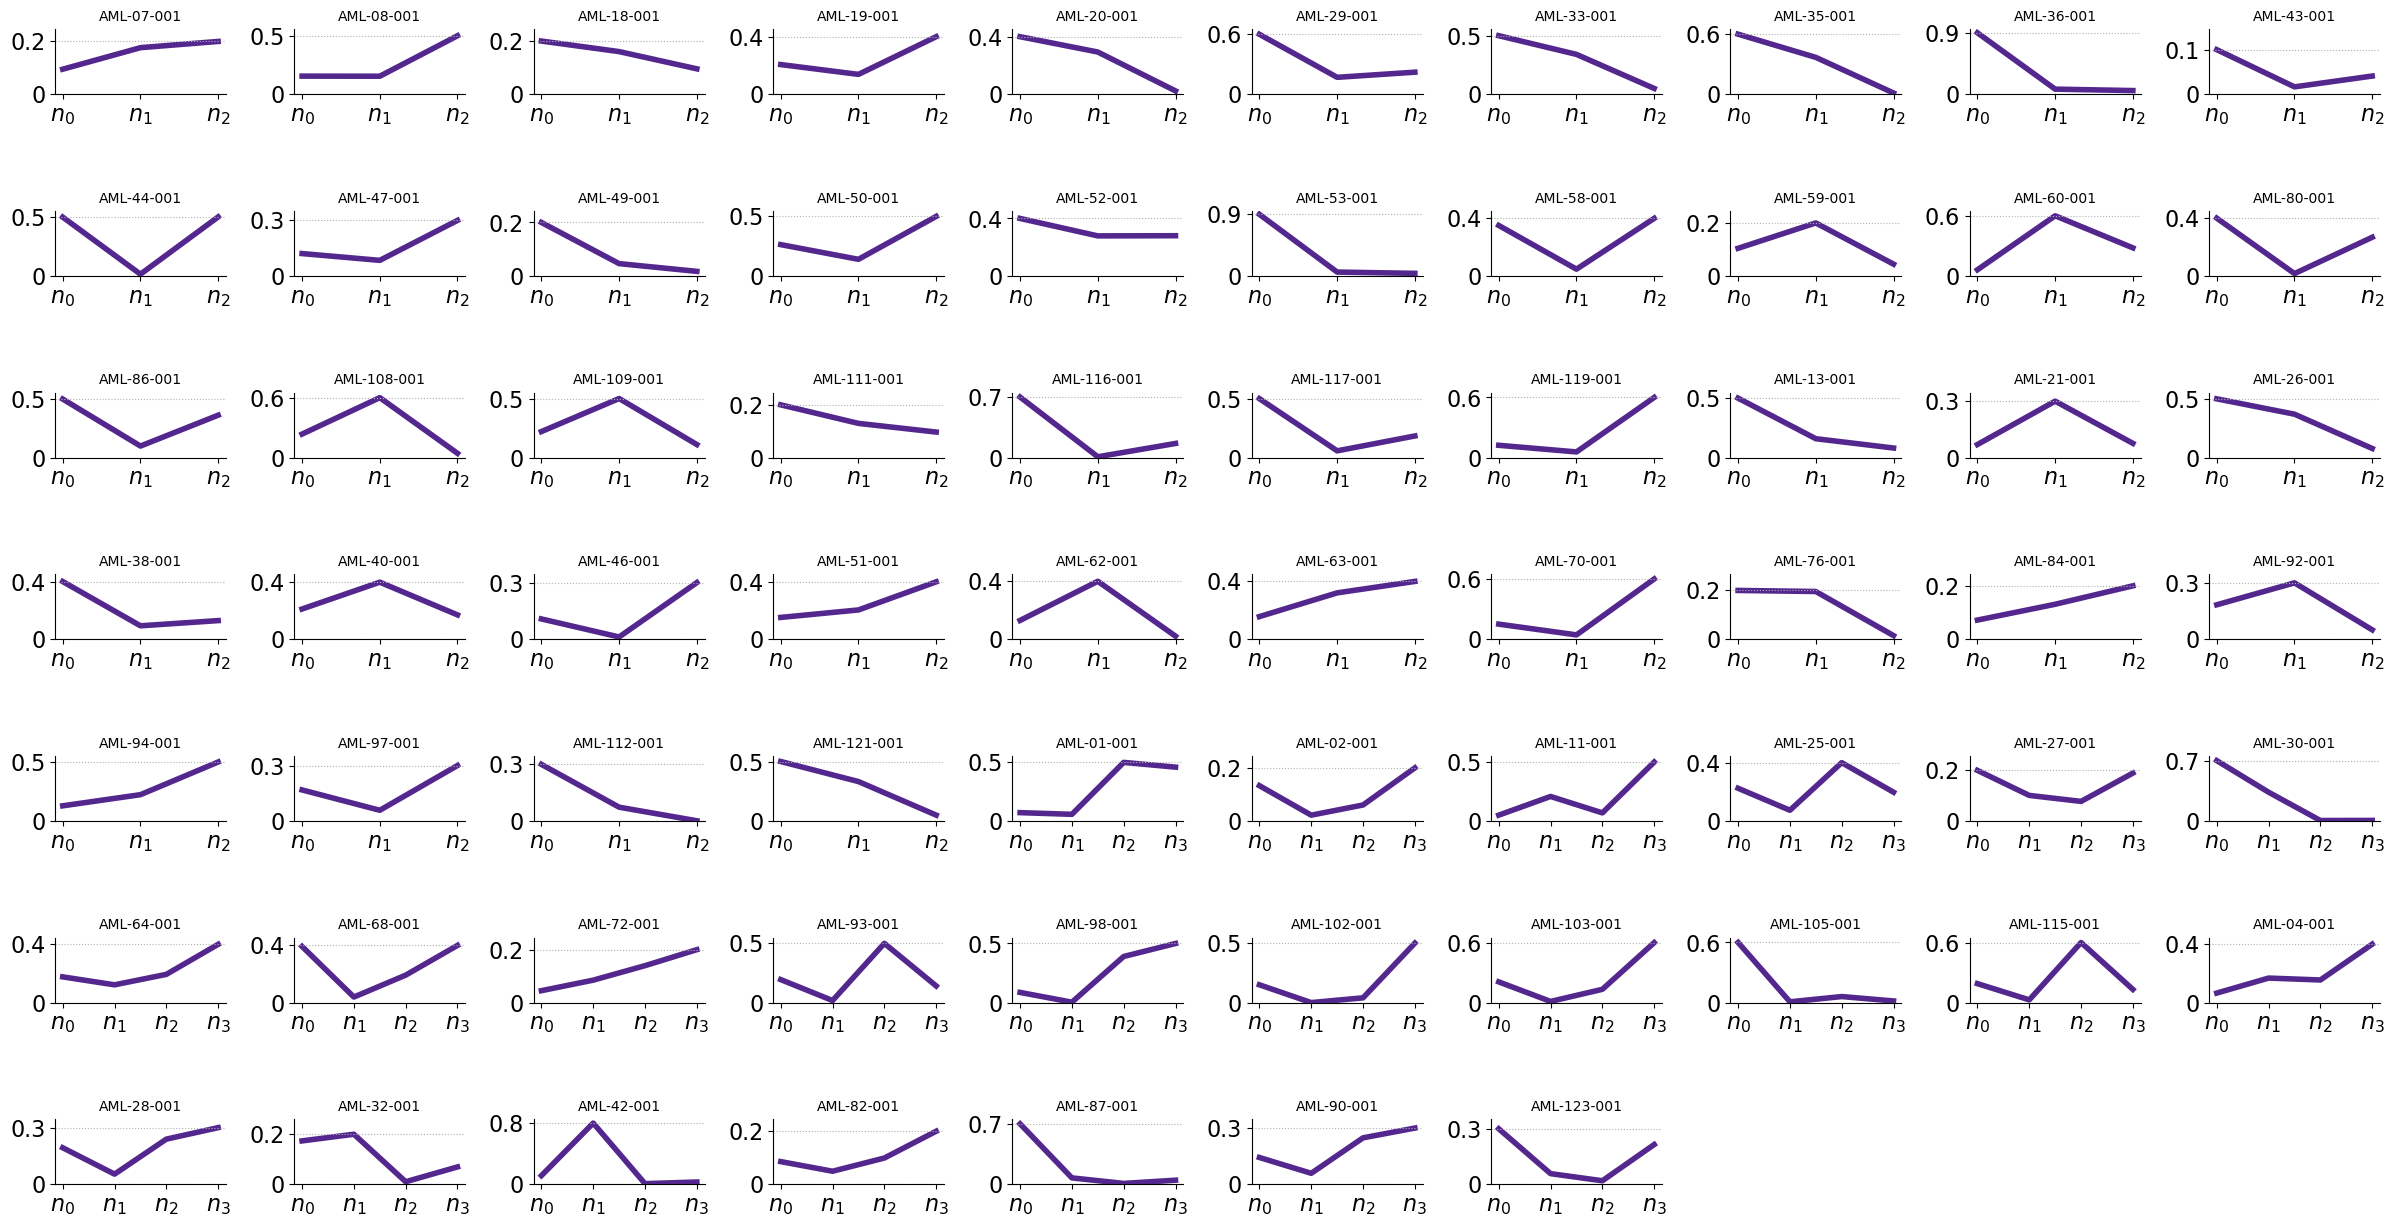

In [120]:
import matplotlib

col = 10
rows = 7

plt.clf()
plt.close('all')
f, ax = plt.subplots(rows,col, figsize=(30,15))

font = {'weight' : 'normal','size'   : 16}
matplotlib.rc('font', **font)
f.subplots_adjust(wspace=0.4)
f.subplots_adjust(hspace=1.8)

total_exp_val = 0
m = 0
n = 0


for index, row in three_hit_linear_morita.iterrows():
    case_n0 = row['$n_0$']
    case_n1 = row['$n_1$']
    case_n2 = row['$n_2$']
#     case_n3 = row['$n_3$']
    sample_label=row['sample_label']
    real_tree =  [case_n0, case_n1, case_n2]
#     print(sample_label, real_tree)
    ax[m][n].plot([0,1,2], real_tree, label=sample_label, color = purple5, zorder = 1, linewidth=4)
    ax[m][n].set_xticks(range(len(real_tree)))
    ax[m][n].set_xticklabels(['$n_0$','$n_1$','$n_2$'])
    ax[m][n].set_ylim(0, max(real_tree)+0.05)
    ax[m][n].set_yticks([0,max(real_tree)])
    ax[m][n].set_yticklabels(['0',round(max(real_tree),1)])
    ax[m][n].set_title(sample_label, fontsize=10)    
    ax[m][n].grid(axis = 'y', which = 'both', zorder = 0, linestyle = ':')
    ax[m][n].spines['top'].set_visible(False)
    ax[m][n].spines['right'].set_visible(False)
    
    n+=1
    if n%col==0:
        m+=1
        n=0
        
for index, row in three_hit_branched_morita.iterrows():
    case_n0 = row['$n_0$']
    case_n1 = row['$n_1$']
    case_n2 = row['$n_2$']
#     case_n3 = row['$n_3$']
    sample_label=row['sample_label']
    real_tree =  [case_n0, case_n1, case_n2]
#     print(sample_label, real_tree)
    ax[m][n].plot([0,1,2], real_tree, label=sample_label, color = purple5, zorder = 1, linewidth=4)
    ax[m][n].set_xticks(range(len(real_tree)))
    ax[m][n].set_xticklabels(['$n_0$','$n_1$','$n_2$'])
    ax[m][n].set_ylim(0, max(real_tree)+0.05)
    ax[m][n].set_yticks([0,max(real_tree)])
    ax[m][n].set_yticklabels(['0',round(max(real_tree),1)])
    ax[m][n].set_title(sample_label, fontsize=10)    
    ax[m][n].grid(axis = 'y', which = 'both', zorder = 0, linestyle = ':')
    ax[m][n].spines['top'].set_visible(False)
    ax[m][n].spines['right'].set_visible(False)
    
    n+=1
    if n%col==0:
        m+=1
        n=0



print('four_hit_linear_morita')
for index, row in four_hit_linear_morita.iterrows():
    case_n0 = row['$n_0$']
    case_n1 = row['$n_1$']
    case_n2 = row['$n_2$']
    case_n3 = row['$n_3$']
    sample_label=row['sample_label']
    real_tree =  [case_n0, case_n1, case_n2, case_n3]
#     print(sample_label, real_tree)
    ax[m][n].plot([0,1,2, 3], real_tree, label=sample_label, color = purple5, zorder = 1, linewidth=4)
    ax[m][n].set_xticks(range(len(real_tree)))
    ax[m][n].set_xticklabels(['$n_0$','$n_1$','$n_2$','$n_3$'])
    ax[m][n].set_ylim(0, max(real_tree)+0.05)
    ax[m][n].set_yticks([0,max(real_tree)])
    ax[m][n].set_yticklabels(['0',round(max(real_tree),1)])
    ax[m][n].set_title(sample_label, fontsize=10)    
    ax[m][n].grid(axis = 'y', which = 'both', zorder = 0, linestyle = ':')
    ax[m][n].spines['top'].set_visible(False)
    ax[m][n].spines['right'].set_visible(False)
    
    n+=1
    if n%col==0:
        m+=1
        n=0
        
for index, row in four_hit_branched_morita.iterrows():
    case_n0 = row['$n_0$']
    case_n1 = row['$n_1$']
    case_n2 = row['$n_2$']
    case_n3 = row['$n_3$']
    sample_label=row['sample_label']
    real_tree =  [case_n0, case_n1, case_n2, case_n3]
#     print(sample_label, real_tree)
    ax[m][n].plot([0,1,2, 3], real_tree, label=sample_label, color = purple5, zorder = 1, linewidth=4)
    ax[m][n].set_xticks(range(len(real_tree)))
    ax[m][n].set_xticklabels(['$n_0$','$n_1$','$n_2$','$n_3$'])
    ax[m][n].set_ylim(0, max(real_tree)+0.05)
    ax[m][n].set_yticks([0,max(real_tree)])
    ax[m][n].set_yticklabels(['0',round(max(real_tree),1)])
    ax[m][n].set_title(sample_label, fontsize=10)    
    ax[m][n].grid(axis = 'y', which = 'both', zorder = 0, linestyle = ':')
    ax[m][n].spines['top'].set_visible(False)
    ax[m][n].spines['right'].set_visible(False)
    
    n+=1
    if n%col==0:
        m+=1
        n=0
        
while m<rows and n<col:
    
    ax[m][n].spines['top'].set_visible(False)
    ax[m][n].spines['right'].set_visible(False)
    ax[m][n].spines['bottom'].set_visible(False)
    ax[m][n].spines['left'].set_visible(False)
    ax[m][n].set_xticks([])
    ax[m][n].set_xticklabels([])
    ax[m][n].set_yticks([])
    ax[m][n].set_yticklabels([])
    
    n+=1
    if n%col==0:
        m+=1
        n=0


        
# plt.savefig('My_graphs/all_44_23_clone_size_vectors_from_morita.pdf', bbox_inches = 'tight')
    

# Finding best matching real tree for each real tree

In [124]:
list_of_params_labels = ['s0/mu10minus5', 's3/mu10minus5', 's6/mu10minus5',\
                         's9/mu10minus5', 's12/mu10minus5', 's15/mu10minus5',\
                         's18/mu10minus5', 's21/mu10minus5','s24/mu10minus5',\
                        's27/mu10minus5','s30/mu10minus5']
lower=-6
med =-5
higher =-4

mapping = {(0,higher):'s0/mu10minus4',(0.03,higher):'s3/mu10minus4', (0.06,higher):'s6/mu10minus4', \
           (0.09,higher):'s9/mu10minus4', (0.12,higher):'s12/mu10minus4', (0.15, higher):'s15/mu10minus4',\
           (0.18, higher):'s18/mu10minus4',(0.21, higher): 's21/mu10minus4', (0.24, higher):'s24/mu10minus4',\
           (0.27, higher): 's27/mu10minus4', (0.30, higher):'s30/mu10minus4',\
             (0,med):'s0/mu10minus5', (0.03,med):'s3/mu10minus5',  (0.06,med):'s6/mu10minus5',\
           (0.09, med):'s9/mu10minus5', (0.12, med):'s12/mu10minus5', (0.15, med):'s15/mu10minus5',\
           (0.18, med):'s18/mu10minus5', (0.21, med):'s21/mu10minus5',(0.24, med):'s24/mu10minus5',\
           (0.27, med):'s27/mu10minus5', (0.30, med):'s30/mu10minus5'}

In [1]:
## k=3 and k=4
import matplotlib

# df = pd.read_csv('dataframes_for_distance_metrics/k_3_4000_clone_size_vectors_for_0_3_6_9_12_15_18_21_24_27_30_with_morita_tree_comparison.csv')
# df_k3 = pd.read_csv('dataframes_for_distance_metrics/k_3_4000_clone_size_vectors_for_0_3_6_9_12_15_18_21_24_27_30_with_Poon_tree_comparison.csv')

# df = pd.read_csv('dataframes_for_distance_metrics/k_4_4000_clone_size_vectors_for_9_12_15_18_21_24_27_30_with_morita_tree_comparison.csv')
# df_k4 = pd.read_csv('dataframes_for_distance_metrics/k_4_4000_clone_size_vectors_for_9_12_15_18_21_24_27_30_with_Poon_tree_comparison.csv')

dictionary_total_exp_val={}
for params in list_of_params_labels[2::]:
#     try:
    all_sims_k3 = df_k3[df_k3['params_label']==params]
    all_sims_k4 = df_k4[df_k4['params_label']==params]


    plt.clf()
    plt.close('all')
    rows = 2
    cols = 6
#         f, ax = plt.subplots(rows,cols, figsize=(15,11))
    f, ax = plt.subplots(rows,cols, figsize=(18,5))

    font = {'weight' : 'normal','size'   : 16}
    matplotlib.rc('font', **font)
    f.subplots_adjust(wspace=0.4)
    f.subplots_adjust(hspace=0.5)

    m = 0
    n = 0
    total_exp_val = 0
    for index, row in four_hit_linear_Poon.iterrows():
        case_n0 = row['$f_0$']
        case_n1 = row['$f_1$']
        case_n2 = row['$f_2$']
        case_n3 = row['$f_3$']
        sample_label=row['sample_label']

#             all_sims[str(sample_label)+' exp. diff']= np.exp(-abs(all_sims['$f_0$'] - case_n0)) + np.exp(-abs(all_sims['$f_1$'] - case_n1)) + np.exp(-abs(all_sims['$f_2$'] - case_n2))
        all_sims_k4[str(sample_label)+' exp. diff']= np.exp(-abs(all_sims_k4['$f_0$'] - case_n0)) + np.exp(-abs(all_sims_k4['$f_1$'] - case_n1)) + np.exp(-abs(all_sims_k4['$f_2$'] - case_n2))+ np.exp(-abs(all_sims_k4['$f_3$'] - case_n3))
        #         print(all_sims[str(sample_label)+' sq. diff'])
        max_ind = all_sims_k4[str(sample_label)+' exp. diff'].idxmax()        
        #         print('params', params,'sample', sample_label,'max_ind', max_ind)
        best_matched_sim = all_sims_k4.loc[max_ind]
        total_exp_val+=all_sims_k4.loc[max_ind][str(sample_label)+' exp. diff']

#             tree = [best_matched_sim['$f_0$'],best_matched_sim['$f_1$'],best_matched_sim['$f_2$']]
        tree = [best_matched_sim['$f_0$'],best_matched_sim['$f_1$'],best_matched_sim['$f_2$'],best_matched_sim['$f_3$']]
        ax[m][n].plot(range(len(tree)), tree, color = '#dd1c77', linewidth=3)      

#             real_tree =  [case_n0, case_n1, case_n2]
        real_tree =  [case_n0, case_n1, case_n2, case_n3]
#             print(sample_label, real_tree)
        ax[m][n].plot([0,1,2,3], real_tree, label=sample_label, color = purple5, zorder = 1, linewidth=6)
        ax[m][n].set_xticks(range(len(real_tree)))
        ax[m][n].set_xticklabels(['$n_0$','$n_1$','$n_2$','$n_3$'])
        ax[m][n].set_ylim(0, max([max(real_tree),max(tree)])+0.05)
        ax[m][n].set_yticks([0,max([max(real_tree),max(tree)])])
        ax[m][n].set_yticklabels(['0',round(max([max(real_tree),max(tree)]),1)])
        ax[m][n].set_title(sample_label, fontsize=16)  
        ax[m][n].grid(axis = 'y', which = 'both', zorder = 0, linestyle = ':')
        ax[m][n].spines['top'].set_visible(False)
        ax[m][n].spines['right'].set_visible(False)

        n+=1
        if n%cols==0:
            m+=1
            n=0

#     for index, row in three_hit_linear_Poon[0:6].iterrows():
#         case_n0 = row['$f_0$']
#         case_n1 = row['$f_1$']
#         case_n2 = row['$f_2$']
# #             case_n3 = row['$f_3$']
#         sample_label=row['sample_label']

#         all_sims_k3[str(sample_label)+' exp. diff']= np.exp(-abs(all_sims_k3['$f_0$'] - case_n0)) + np.exp(-abs(all_sims_k3['$f_1$'] - case_n1)) + np.exp(-abs(all_sims_k3['$f_2$'] - case_n2))
# #             all_sims[str(sample_label)+' exp. diff']= np.exp(-abs(all_sims['$f_0$'] - case_n0)) + np.exp(-abs(all_sims['$f_1$'] - case_n1)) + np.exp(-abs(all_sims['$f_2$'] - case_n2))+ np.exp(-abs(all_sims['$f_3$'] - case_n3))
#         #         print(all_sims[str(sample_label)+' sq. diff'])
#         max_ind = all_sims_k3[str(sample_label)+' exp. diff'].idxmax()        
#         #         print('params', params,'sample', sample_label,'max_ind', max_ind)
#         best_matched_sim = all_sims_k3.loc[max_ind]
#         total_exp_val+=all_sims_k3.loc[max_ind][str(sample_label)+' exp. diff']

#         tree = [best_matched_sim['$f_0$'],best_matched_sim['$f_1$'],best_matched_sim['$f_2$']]
# #             tree = [best_matched_sim['$f_0$'],best_matched_sim['$f_1$'],best_matched_sim['$f_2$'],best_matched_sim['$f_3$']]
#         ax[m][n].plot(range(len(tree)), tree, color = '#dd1c77', linewidth=3)      

#         real_tree =  [case_n0, case_n1, case_n2]
# #             real_tree =  [case_n0, case_n1, case_n2, case_n3]
# #             print(sample_label, real_tree)
#         ax[m][n].plot([0,1,2], real_tree, label=sample_label, color = purple5, zorder = 1, linewidth=6)
#         ax[m][n].set_xticks(range(len(real_tree)))
#         ax[m][n].set_xticklabels(['$n_0$','$n_1$','$n_2$'])
#         ax[m][n].set_ylim(0, max([max(real_tree),max(tree)])+0.05)
#         ax[m][n].set_yticks([0,max([max(real_tree),max(tree)])])
#         ax[m][n].set_yticklabels(['0',round(max([max(real_tree),max(tree)]),1)])
#         ax[m][n].set_title(sample_label, fontsize=16)    
#         ax[m][n].grid(axis = 'y', which = 'both', zorder = 0, linestyle = ':')
#         ax[m][n].spines['top'].set_visible(False)
#         ax[m][n].spines['right'].set_visible(False)

#         n+=1
#         if n%cols==0:
#             m+=1
#             n=0


    while m<rows and n<cols:
        ax[m][n].spines['top'].set_visible(False)
        ax[m][n].spines['right'].set_visible(False)
        ax[m][n].spines['bottom'].set_visible(False)
        ax[m][n].spines['left'].set_visible(False)
        ax[m][n].set_xticks([])
        ax[m][n].set_xticklabels([])
        ax[m][n].set_yticks([])
        ax[m][n].set_yticklabels([])

        n+=1
        if n%cols==0:
            m+=1
            n=0

    filename_params = params.split('/')[0]+params.split('/')[1]
    dictionary_total_exp_val[params]=total_exp_val
    print('params', params, 'total_exp_val', total_exp_val)

#     plt.savefig('dataframes_for_distance_metrics/set_of_tree_comparison/1000_four_hit_Poon/params_'+str(filename_params)+'.pdf', bbox_inches = 'tight')
#     except:
#         print('params', params)
        
#         pass
#     break

# Plotting inferences

In [ ]:
from collections import Counter
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.patches as mpatches
import statsmodels.graphics.mosaicplot as mp
import matplotlib

In [481]:
import matplotlib.pyplot as plt 
from mpl_toolkits.axes_grid1 import make_axes_locatable 
  
def plot_k3_as_colorplot(dictionary_total_exp_val, plot_title):
    Count_array = []
    for s in [0,0.03,0.06,0.09,0.12,0.15,0.18, 0.21,0.24,0.27,0.30]:
        mu_direction = []
        for mu in [med,higher]:
    #             print(mapping[(s, mu)])
            try:
                entry= dictionary_total_exp_val[mapping[(s, mu)]]
            except:
                entry = 0
            mu_direction.append(entry)
        Count_array.append(mu_direction)

    y, x = np.meshgrid([med,higher], [0,0.03,0.06,0.09,0.12,0.15,0.18, 0.21,0.24,0.27,0.30])
    y, x = np.meshgrid([med,higher], [0,1,2,3,4,5,6,7,8,9,10])
    
    minimum= dictionary_total_exp_val['s27/mu10minus5']*0.99
    maximum= 0.99

    plt.clf()
    plt.close('all')
    f, ax = plt.subplots(1,1, figsize=(11*2.5,2))
#     f, ax = plt.subplots(1,1, figsize=(11*3,2.5))
    #     f, ax = plt.subplots(1,1, figsize=(14,2.5))
    font = {'weight' : 'normal','size'   : 25}
    matplotlib.rc('font', **font)
    f.subplots_adjust(wspace=0.4)

# , vmin = dictionary_total_exp_val['s6/mu10minus5']
    c = ax.pcolormesh(x, y, Count_array, cmap='copper', vmin = minimum, vmax=maximum)
    print('max:', maximum, 'min:', minimum)
    #     ax[1].set_title('Underlying parameter space')
    #     ax.set_xlabel('$s$', fontsize = 30)
    #     ax[1].set_ylabel('$\mu$', fontsize = 21)
    ax.set_ylim(-5.5,-4.5)

    y_major_ticks = []
    y_major_tick_labels = []
    x_major_ticks = []
    x_major_tick_labels = []
    x_major_ticks = [0, 1,2,3,4,5,6,7,8,9,10]
    x_major_tick_labels = ["0%", "3%", "6%", "9%", "12%", "15%", "18%",  "21%", "24%", "27%",  "30%"]

    ax.set_yticks(y_major_ticks)
    ax.set_yticklabels(y_major_tick_labels)
    ax.set_xticks(x_major_ticks)
    ax.set_xticklabels(x_major_tick_labels, fontsize=30)
    ax.margins(x=0)
    # set the limits of the plot to the limits of the data
#     ax.axis([x.min(), x.max(), y.min(), y.max()])
    divider = make_axes_locatable(ax) 
    colorbar_axes = divider.append_axes("right", 
                                    size="1%", 
                                    pad=1) 
    plt.colorbar(c, cax=colorbar_axes)
#     plt.colorbar.ax.set_ylabel()


    #     break
#     plt.savefig('paper_schematics/'+plot_title+'.pdf', bbox_inches = 'tight')


In [479]:

def plot_k4_as_colorplot(dictionary_total_exp_val, plot_title):

    Count_array = []
    for s in [0,0.03,0.06,0.09,0.12,0.15,0.18, 0.21,0.24,0.27,0.30]:
        mu_direction = []
        for mu in [med,higher]:
    #             print(mapping[(s, mu)])
            try:
                entry= dictionary_total_exp_val[mapping[(s, mu)]]
            except:
                entry = 0
            mu_direction.append(entry)
        Count_array.append(mu_direction)

    y, x = np.meshgrid([med,higher], [0,0.03,0.06,0.09,0.12,0.15,0.18, 0.21,0.24,0.27,0.30])
    y, x = np.meshgrid([med,higher], [0,1,2,3,4,5,6,7,8,9,10])
    print(count_array)
    
    minimum= dictionary_total_exp_val['s27/mu10minus5']*0.99
    maximum= dictionary_total_exp_val['s12/mu10minus5']

    plt.clf()
    plt.close('all')
    f, ax = plt.subplots(1,1, figsize=(11*2.5,2.5))
#     f, ax = plt.subplots(1,1, figsize=(11*3,2.5))
    #     f, ax = plt.subplots(1,1, figsize=(14,2.5))
    font = {'weight' : 'normal','size'   : 25}
    matplotlib.rc('font', **font)
    f.subplots_adjust(wspace=0.4)


    c = ax.pcolormesh(x, y, Count_array, cmap='copper', vmin = minimum, vmax=maximum)
    print('max:', maximum, 'min:', minimum)
    #     ax[1].set_title('Underlying parameter space')
    #     ax.set_xlabel('$s$', fontsize = 30)
    #     ax[1].set_ylabel('$\mu$', fontsize = 21)
    ax.set_ylim(-5.5,-4.5)

    y_major_ticks = []
    y_major_tick_labels = []
    x_major_ticks = []
    x_major_tick_labels = []
    x_major_ticks = [0, 1,2,3,4,5,6,7,8,9,10]
    x_major_tick_labels = ["0%", "3%", "6%", "9%", "12%", "15%", "18%",  "21%", "24%", "27%",  "30%"]

    ax.set_yticks(y_major_ticks)
    ax.set_yticklabels(y_major_tick_labels)
    ax.set_xticks(x_major_ticks)
    ax.set_xticklabels(x_major_tick_labels, fontsize=30)
    ax.margins(x=0)
    # set the limits of the plot to the limits of the data
# #     ax.axis([x.min(), x.max(), y.min(), y.max()])
    divider = make_axes_locatable(ax) 
    colorbar_axes = divider.append_axes("right", 
                                    size="1%", 
                                    pad=1) 
    plt.colorbar(c, cax=colorbar_axes)
#     plt.colorbar.ax.set_ylabel()


    #     break
#     plt.savefig('paper_schematics/'+plot_title+'.pdf', bbox_inches = 'tight')


In [449]:
def plot_k3_as_lineplot(dictionary_total_exp_val, plot_title):
    
    plt.clf()
    plt.close('all')
    f, ax = plt.subplots(1,1, figsize=(15,1))
    font = {'weight' : 'normal','size'   : 16}
    matplotlib.rc('font', **font)
    f.subplots_adjust(wspace=0.4)

    list_of_similarity = list(dictionary_total_exp_val.values())
    ax.scatter([0,0.03,0.06,0.09,0.12,0.15,0.18,0.21,0.24,0.27,0.30], np.log(list_of_similarity), color = purple5, marker = '^')
    ax.plot([0,0.03,0.06,0.09,0.12,0.15,0.18,0.21,0.24,0.27,0.30], np.log(list_of_similarity), color = purple5)

    list_of_similarity = list_of_similarity[2::]
    # list_of_similarity = [dictionary_total_exp_val['s9/mu10minus5'],dictionary_total_exp_val['s12/mu10minus5'],dictionary_total_exp_val['s15/mu10minus5'],dictionary_total_exp_val['s18/mu10minus5'],dictionary_total_exp_val['s21/mu10minus5'],dictionary_total_exp_val['s30/mu10minus5']]
    # ax.bar([0.09,0.12,0.15,0.18,0.21,0.30], list_of_similarity, color = grey3, width=0.02)
    # ax.set_xticks(range(len(real_tree)))
    # ax.set_xticklabels(['$n_0$','$n_1$','$n_2$'])
    ax.set_ylim(min(np.log(list_of_similarity))*0.99,max(np.log(list_of_similarity))*1.01)
    ax.set_xlim(-0.015,0.305)
    ax.hlines(y=max(np.log(list_of_similarity)), xmin=-0.015, xmax=0.30, color=grey2, linestyle='--')

    y_major_ticks = [min(np.log(list_of_similarity)),max(np.log(list_of_similarity))]
    y_major_tick_labels = ['min', 'max']
    y_major_ticks = [max(np.log(list_of_similarity))]
    y_major_tick_labels = ['max']
    x_major_ticks = [0,0.03,0.06,0.09,0.12,0.15,0.18,0.21,0.24,0.27,0.30]
    x_major_tick_labels = ["0%", "3%", "6%", "9%", "12%", "15%", "18%","21%","24%","27%","30%"]
    # x_major_ticks = [0.09,0.12, 0.15,0.18, 0.21, 0.30]
    # x_major_tick_labels = [ "9%", "12%", "15%",  "18%","21%","30%"]

    ax.set_yticks(y_major_ticks)
    ax.set_yticklabels(y_major_tick_labels)
    ax.set_xticks(x_major_ticks)
    ax.set_xticklabels(x_major_tick_labels, fontsize=20)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

#     plt.savefig('paper_schematics/'+plot_title+'.pdf', bbox_inches = 'tight')


In [450]:
def plot_k4_as_lineplot(dictionary_total_exp_val, plot_title):
    
    plt.clf()
    plt.close('all')
    f, ax = plt.subplots(1,1, figsize=(15,1))
    font = {'weight' : 'normal','size'   : 16}
    matplotlib.rc('font', **font)
    f.subplots_adjust(wspace=0.4)

    list_of_similarity = list(dictionary_total_exp_val.values())
    ax.scatter([0.09,0.12,0.15,0.18,0.21,0.24,0.27,0.30], np.log(list_of_similarity), color = purple5, marker = '^')
    ax.plot([0.09,0.12,0.15,0.18,0.21,0.24,0.27,0.30], np.log(list_of_similarity), color = purple5)

    # list_of_similarity = [dictionary_total_exp_val['s9/mu10minus5'],dictionary_total_exp_val['s12/mu10minus5'],dictionary_total_exp_val['s15/mu10minus5'],dictionary_total_exp_val['s18/mu10minus5'],dictionary_total_exp_val['s21/mu10minus5'],dictionary_total_exp_val['s30/mu10minus5']]
    # ax.bar([0.09,0.12,0.15,0.18,0.21,0.30], list_of_similarity, color = grey3, width=0.02)
    # ax.set_xticks(range(len(real_tree)))
    # ax.set_xticklabels(['$n_0$','$n_1$','$n_2$'])
    ax.set_ylim(min(np.log(list_of_similarity))*0.99,max(np.log(list_of_similarity))*1.01)
    ax.set_xlim(-0.015,0.305)
    ax.hlines(y=max(np.log(list_of_similarity)), xmin=-0.015, xmax=0.30, color=grey2, linestyle='--')

    y_major_ticks = [min(np.log(list_of_similarity)),max(np.log(list_of_similarity))]
    y_major_tick_labels = ['min', 'max']
    x_major_ticks = [0,0.03,0.06,0.09,0.12,0.15,0.18,0.21,0.24,0.27,0.30]
    x_major_tick_labels = ["0%", "3%", "6%", "9%", "12%", "15%", "18%","21%","24%","27%","30%"]
    # x_major_ticks = [0.09,0.12, 0.15,0.18, 0.21, 0.30]
    # x_major_tick_labels = [ "9%", "12%", "15%",  "18%","21%","30%"]

    ax.set_yticks(y_major_ticks)
    ax.set_yticklabels(y_major_tick_labels)
    ax.set_xticks(x_major_ticks)
    ax.set_xticklabels(x_major_tick_labels, fontsize=20)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

#     plt.savefig('paper_schematics/'+plot_title+'.pdf', bbox_inches = 'tight')
    

In [474]:
# k=3 only , Poon, normalised
dictionary_total_exp_val = {'s0/mu10minus5': 13.308159454854204/(6*3), 's3/mu10minus5': 15.617703388375283/(6*3), 's6/mu10minus5': 16.79941866435626/(6*3), 's9/mu10minus5': 17.473461919417076/(6*3), 's12/mu10minus5': 17.787767360178815/(6*3), 's15/mu10minus5': 17.72960224543469/(6*3), 's18/mu10minus5': 17.756753528632633/(6*3), 's21/mu10minus5': 17.647137340751357/(6*3), 's24/mu10minus5': 17.708429255309678/(6*3), 's27/mu10minus5': 17.549508084959903/(6*3), 's30/mu10minus5': 17.65649242282013/(6*3)}


# # # k=4 only , Poon, normalised
dictionary_total_exp_val = {'s9/mu10minus5': 23.337297559444202/(6*4), 's12/mu10minus5': 23.559761083417047/(6*4), 's15/mu10minus5': 22.9266174305655/(6*4), 's18/mu10minus5': 22.012580209402604/(6*4), 's21/mu10minus5': 22.222147793328464/(6*4), 's24/mu10minus5': 21.83728225881059/(6*4), 's27/mu10minus5': 21.814511901014463/(6*4), 's30/mu10minus5': 21.82880091320176/(6*4)}


# # k=3 and k=4 considered tgt, Poon
# dictionary_total_exp_val={'s9/mu10minus5': 40.81075947886127, 's12/mu10minus5': 41.34752844359586, 's15/mu10minus5': 40.6562196760002, 's18/mu10minus5': 39.76933373803523, 's21/mu10minus5': 39.86928513407982, 's24/mu10minus5': 39.54571151412027, 's27/mu10minus5': 39.364019985974366, 's30/mu10minus5': 39.48529333602189}


In [482]:
# k = 3, Morita
# dictionary_total_exp_val = {'s0/mu10minus5': 96.89222446059787, 's3/mu10minus5': 111.19720642443863, 's6/mu10minus5': 120.63460014188071, 's9/mu10minus5': 128.29887417310616, 's12/mu10minus5': 130.2448815722738, 's15/mu10minus5': 130.09465994354855, 's18/mu10minus5': 129.69626666462793, 's21/mu10minus5': 129.22332854865164, 's24/mu10minus5': 128.9332579749682, 's27/mu10minus5': 128.13719073650583, 's30/mu10minus5': 128.08401061777585}

# # k = 3, morita linear only, normalised
dictionary_total_exp_val =  {'s0/mu10minus5': 60.40747922104695/(27*3), 's3/mu10minus5': 69.37990543918468/(27*3), 's6/mu10minus5': 74.67170664297899/(27*3), 's9/mu10minus5': 79.02120104155921/(27*3), 's12/mu10minus5': 80.06416042087126/(27*3), 's15/mu10minus5': 79.80077760905651/(27*3), 's18/mu10minus5': 79.65589048024427/(27*3), 's21/mu10minus5': 79.32183790983525/(27*3), 's24/mu10minus5': 79.38917500229739/(27*3), 's27/mu10minus5': 78.61593108615554/(27*3), 's30/mu10minus5': 78.44545512336954/(27*3)}
  
# # k = 4, morita
# dictionary_total_exp_val =  {'s9/mu10minus5': 88.03814482818677, 's12/mu10minus5': 88.28230333153505, 's15/mu10minus5': 87.83507675409776, 's18/mu10minus5': 86.61767539103865, 's21/mu10minus5': 87.02584523750737, 's24/mu10minus5': 85.90341558079936, 's27/mu10minus5': 85.68260513513295, 's30/mu10minus5': 85.40880086969723}


[[21.49060791667698, 21.58224159785266, 22.5319251567727, 22.820843874338927, 22.84597883259082], [19.91955959014643, 21.41828608917077, 21.475884109565786, 21.48819758094843, 23.244164428043433], [19.327571012030777, 19.85096100797605, 21.045019462538434, 21.490102248287215, 22.81325637418428], [18.976159899598223, 19.25494846180029, 21.02127729225611, 21.542361828476942, 21.74520322382048], [18.801393505623995, 20.636908087771143, 21.10153025469791, 21.223081586435477, 21.637658901317177], [19.34941934356469, 20.37237939697313, 20.998699226898502, 21.39228477208595, 21.694775161592595], [18.927803305831993, 20.20238995102308, 20.932644248885317, 21.52832721970765, 21.60748605509963], [20.385653100464076, 20.68606721770552, 20.769177297318596, 21.606787034249752, 21.78555002656104]]
max: 0.9685068511684763 min: 0.8913087997728598


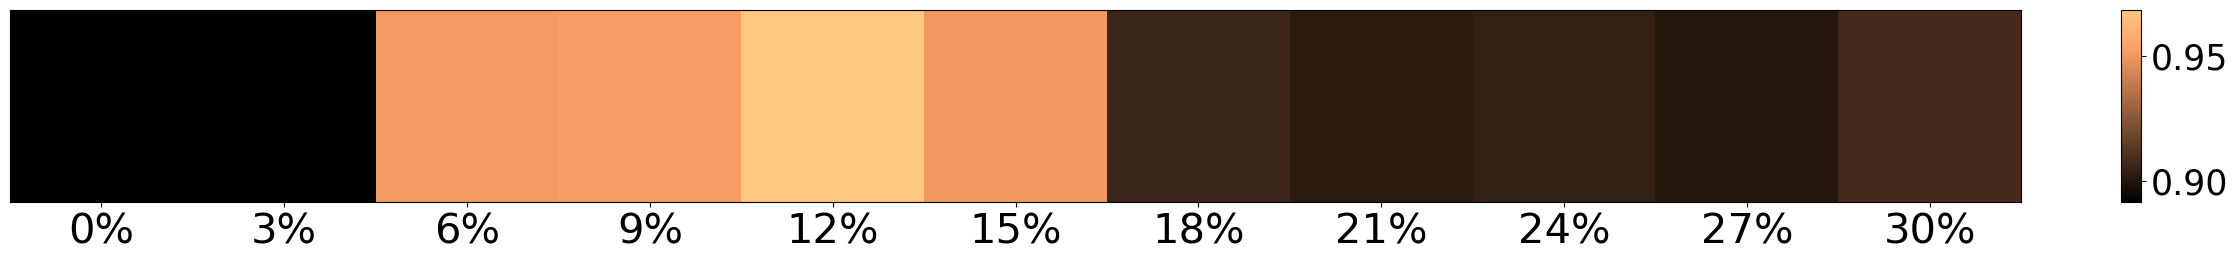

In [487]:
plot_title = 'colorplot_similarity_to_Poon_k4_normalized'
plot_k4_as_colorplot(dictionary_total_exp_val, plot_title)

# Figure 3

In [2]:
## k=3 and k=4
import matplotlib 

df = pd.read_csv('dataframes_for_distance_metrics/k_3_4000_clone_size_vectors_for_0_3_6_9_12_15_18_21_24_27_30_with_morita_tree_comparison.csv')

# df = pd.read_csv('dataframes_for_distance_metrics/k_4_4000_clone_size_vectors_for_9_12_15_18_21_24_27_30_with_morita_tree_comparison.csv')

dictionary_total_exp_val={}
for params in list_of_params_labels:
#     try:
    all_sims_k3 = df[df['params_label']==params]
#         all_sims_k4 = df[df['params_label']==params]

    plt.clf()
    plt.close('all')
    rows = 9
    cols = 3
    f, ax = plt.subplots(rows,cols, figsize=(3*3,2.5*9))
#     f, ax = plt.subplots(rows,cols, figsize=(3*5,2.5*9))

    font = {'weight' : 'normal','size'   : 16}
    matplotlib.rc('font', **font)
    f.subplots_adjust(wspace=0.4)
    f.subplots_adjust(hspace=0.6)

    m = 0
    n = 0
    total_exp_val = 0


    for index, row in three_hit_linear_morita.iterrows():
        case_n0 = row['$n_0$']
        case_n1 = row['$n_1$']
        case_n2 = row['$n_2$']
#             case_n3 = row['$f_3$']
        sample_label=row['sample_label']

        all_sims_k3[str(sample_label)+' exp. diff']= np.exp(-abs(all_sims_k3['$f_0$'] - case_n0)) + np.exp(-abs(all_sims_k3['$f_1$'] - case_n1)) + np.exp(-abs(all_sims_k3['$f_2$'] - case_n2))
#             all_sims[str(sample_label)+' exp. diff']= np.exp(-abs(all_sims['$f_0$'] - case_n0)) + np.exp(-abs(all_sims['$f_1$'] - case_n1)) + np.exp(-abs(all_sims['$f_2$'] - case_n2))+ np.exp(-abs(all_sims['$f_3$'] - case_n3))
        #         print(all_sims[str(sample_label)+' sq. diff'])
        max_ind = all_sims_k3[str(sample_label)+' exp. diff'].idxmax()        
        #         print('params', params,'sample', sample_label,'max_ind', max_ind)
        best_matched_sim = all_sims_k3.loc[max_ind]
        total_exp_val+=all_sims_k3.loc[max_ind][str(sample_label)+' exp. diff']

        tree = [best_matched_sim['$f_0$'],best_matched_sim['$f_1$'],best_matched_sim['$f_2$']]
#             tree = [best_matched_sim['$f_0$'],best_matched_sim['$f_1$'],best_matched_sim['$f_2$'],best_matched_sim['$f_3$']]
        ax[m][n].plot(range(len(tree)), tree, color = '#dd1c77', linewidth=3)      

        real_tree =  [case_n0, case_n1, case_n2]
#             real_tree =  [case_n0, case_n1, case_n2, case_n3]
#             print(sample_label, real_tree)
        ax[m][n].plot([0,1,2], real_tree, label=sample_label, color = purple5, zorder = 1, linewidth=6)
        ax[m][n].set_xticks(range(len(real_tree)))
        ax[m][n].set_xticklabels(['$n_0$','$n_1$','$n_2$'])
        ax[m][n].set_ylim(0, max([max(real_tree),max(tree)])+0.05)
        ax[m][n].set_yticks([0,max([max(real_tree),max(tree)])])
        ax[m][n].set_yticklabels(['0',round(max([max(real_tree),max(tree)]),1)])
        morita_sample_label = sample_label.split('-')[1]
        ax[m][n].set_title('morita-'+morita_sample_label, fontsize=16)    
        ax[m][n].grid(axis = 'y', which = 'both', zorder = 0, linestyle = ':')
        ax[m][n].spines['top'].set_visible(False)
        ax[m][n].spines['right'].set_visible(False)

        n+=1
        if n%cols==0:
            m+=1
            n=0


#     for index, row in three_hit_branched_morita.iterrows():
#         case_n0 = row['$n_0$']
#         case_n1 = row['$n_1$']
#         case_n2 = row['$n_2$']
# #             case_n3 = row['$f_3$']
#         sample_label=row['sample_label']

#         all_sims_k3[str(sample_label)+' exp. diff']= np.exp(-abs(all_sims_k3['$f_0$'] - case_n0)) + np.exp(-abs(all_sims_k3['$f_1$'] - case_n1)) + np.exp(-abs(all_sims_k3['$f_2$'] - case_n2))
# #             all_sims[str(sample_label)+' exp. diff']= np.exp(-abs(all_sims['$f_0$'] - case_n0)) + np.exp(-abs(all_sims['$f_1$'] - case_n1)) + np.exp(-abs(all_sims['$f_2$'] - case_n2))+ np.exp(-abs(all_sims['$f_3$'] - case_n3))
#         #         print(all_sims[str(sample_label)+' sq. diff'])
#         max_ind = all_sims_k3[str(sample_label)+' exp. diff'].idxmax()        
#         #         print('params', params,'sample', sample_label,'max_ind', max_ind)
#         best_matched_sim = all_sims_k3.loc[max_ind]
#         total_exp_val+=all_sims_k3.loc[max_ind][str(sample_label)+' exp. diff']

#         tree = [best_matched_sim['$f_0$'],best_matched_sim['$f_1$'],best_matched_sim['$f_2$']]
# #             tree = [best_matched_sim['$f_0$'],best_matched_sim['$f_1$'],best_matched_sim['$f_2$'],best_matched_sim['$f_3$']]
#         ax[m][n].plot(range(len(tree)), tree, color = '#dd1c77', linewidth=3)      

#         real_tree =  [case_n0, case_n1, case_n2]
# #             real_tree =  [case_n0, case_n1, case_n2, case_n3]
# #             print(sample_label, real_tree)
#         ax[m][n].plot([0,1,2], real_tree, label=sample_label, color = purple5, zorder = 1, linewidth=6)
#         ax[m][n].set_xticks(range(len(real_tree)))
#         ax[m][n].set_xticklabels(['$n_0$','$n_1$','$n_2$'])
#         ax[m][n].set_ylim(0, max([max(real_tree),max(tree)])+0.05)
#         ax[m][n].set_yticks([0,max([max(real_tree),max(tree)])])
#         ax[m][n].set_yticklabels(['0',round(max([max(real_tree),max(tree)]),1)])
#         ax[m][n].set_title(sample_label, fontsize=16)    
#         ax[m][n].grid(axis = 'y', which = 'both', zorder = 0, linestyle = ':')
#         ax[m][n].spines['top'].set_visible(False)
#         ax[m][n].spines['right'].set_visible(False)

#         n+=1
#         if n%cols==0:
#             m+=1
#             n=0


    while m<rows and n<cols:
        ax[m][n].spines['top'].set_visible(False)
        ax[m][n].spines['right'].set_visible(False)
        ax[m][n].spines['bottom'].set_visible(False)
        ax[m][n].spines['left'].set_visible(False)
        ax[m][n].set_xticks([])
        ax[m][n].set_xticklabels([])
        ax[m][n].set_yticks([])
        ax[m][n].set_yticklabels([])

        n+=1
        if n%cols==0:
            m+=1
            n=0

    filename_params = params.split('/')[0]+params.split('/')[1]
    dictionary_total_exp_val[params]=total_exp_val
    print('params', params, 'total_exp_val', total_exp_val)

#     plt.savefig('dataframes_for_distance_metrics/set_of_tree_comparison/threehit_linear_morita/params_'+str(filename_params)+'_renamed.pdf', bbox_inches = 'tight')
#     except:
#         print('params', params)
        
#         pass
#     break

# Consider fewer virtual AMLs from each selection strengths

In [3]:
## k=3 and k=4
import matplotlib 

# df = pd.read_csv('dataframes_for_distance_metrics/k_3_4000_clone_size_vectors_for_0_3_6_9_12_15_18_21_24_27_30_with_morita_tree_comparison.csv')

df = pd.read_csv('dataframes_for_distance_metrics/k_4_4000_clone_size_vectors_for_9_12_15_18_21_24_27_30_with_morita_tree_comparison.csv')

num_sims_considered = 10
dictionary_total_exp_val={}
for params in list_of_params_labels[3::]:
#     try:
#     all_sims_k3 = df[df['params_label']==params][0:num_sims_considered]
#     print(all_sims_k3)
    all_sims_k4 = df[df['params_label']==params][0:num_sims_considered]

    plt.clf()
    plt.close('all')
    rows = 9
    cols = 5
#         f, ax = plt.subplots(rows,cols, figsize=(15,11))
    f, ax = plt.subplots(rows,cols, figsize=(3*5,2.5*9))

    font = {'weight' : 'normal','size'   : 16}
    matplotlib.rc('font', **font)
    f.subplots_adjust(wspace=0.4)
    f.subplots_adjust(hspace=0.6)

    m = 0
    n = 0
    total_exp_val = 0


    for index, row in four_hit_linear_morita.iterrows():
        case_n0 = row['$n_0$']
        case_n1 = row['$n_1$']
        case_n2 = row['$n_2$']
        case_n3 = row['$n_3$']
        sample_label=row['sample_label']

#         all_sims_k3[str(sample_label)+' exp. diff']= np.exp(-abs(all_sims_k3['$f_0$'] - case_n0)) + np.exp(-abs(all_sims_k3['$f_1$'] - case_n1)) + np.exp(-abs(all_sims_k3['$f_2$'] - case_n2))
        all_sims_k4[str(sample_label)+' exp. diff']= np.exp(-abs(all_sims_k4['$f_0$'] - case_n0)) + np.exp(-abs(all_sims_k4['$f_1$'] - case_n1)) + np.exp(-abs(all_sims_k4['$f_2$'] - case_n2))+ np.exp(-abs(all_sims_k4['$f_3$'] - case_n3))
        #         print(all_sims[str(sample_label)+' sq. diff'])
        max_ind = all_sims_k4[str(sample_label)+' exp. diff'].idxmax()        
        #         print('params', params,'sample', sample_label,'max_ind', max_ind)
        best_matched_sim = all_sims_k4.loc[max_ind]
        total_exp_val+=all_sims_k4.loc[max_ind][str(sample_label)+' exp. diff']

#         tree = [best_matched_sim['$f_0$'],best_matched_sim['$f_1$'],best_matched_sim['$f_2$']]
        tree = [best_matched_sim['$f_0$'],best_matched_sim['$f_1$'],best_matched_sim['$f_2$'],best_matched_sim['$f_3$']]
        ax[m][n].plot(range(len(tree)), tree, color = '#dd1c77', linewidth=3)      

#         real_tree =  [case_n0, case_n1, case_n2]
        real_tree =  [case_n0, case_n1, case_n2, case_n3]
#             print(sample_label, real_tree)
        ax[m][n].plot([0,1,2,3], real_tree, label=sample_label, color = purple5, zorder = 1, linewidth=6)
        ax[m][n].set_xticks(range(len(real_tree)))
        ax[m][n].set_xticklabels(['$n_0$','$n_1$','$n_2$','$n_3$'])
        ax[m][n].set_ylim(0, max([max(real_tree),max(tree)])+0.05)
        ax[m][n].set_yticks([0,max([max(real_tree),max(tree)])])
        ax[m][n].set_yticklabels(['0',round(max([max(real_tree),max(tree)]),1)])
        ax[m][n].set_title(sample_label, fontsize=16)    
        ax[m][n].grid(axis = 'y', which = 'both', zorder = 0, linestyle = ':')
        ax[m][n].spines['top'].set_visible(False)
        ax[m][n].spines['right'].set_visible(False)

        n+=1
        if n%cols==0:
            m+=1
            n=0

    for index, row in four_hit_branched_morita.iterrows():
        case_n0 = row['$n_0$']
        case_n1 = row['$n_1$']
        case_n2 = row['$n_2$']
        case_n3 = row['$n_3$']
        sample_label=row['sample_label']

#         all_sims_k3[str(sample_label)+' exp. diff']= np.exp(-abs(all_sims_k3['$f_0$'] - case_n0)) + np.exp(-abs(all_sims_k3['$f_1$'] - case_n1)) + np.exp(-abs(all_sims_k3['$f_2$'] - case_n2))
        all_sims_k4[str(sample_label)+' exp. diff']= np.exp(-abs(all_sims_k4['$f_0$'] - case_n0)) + np.exp(-abs(all_sims_k4['$f_1$'] - case_n1)) + np.exp(-abs(all_sims_k4['$f_2$'] - case_n2))+ np.exp(-abs(all_sims_k4['$f_3$'] - case_n3))
        #         print(all_sims[str(sample_label)+' sq. diff'])
        max_ind = all_sims_k4[str(sample_label)+' exp. diff'].idxmax()        
        #         print('params', params,'sample', sample_label,'max_ind', max_ind)
        best_matched_sim = all_sims_k4.loc[max_ind]
        total_exp_val+=all_sims_k4.loc[max_ind][str(sample_label)+' exp. diff']

#         tree = [best_matched_sim['$f_0$'],best_matched_sim['$f_1$'],best_matched_sim['$f_2$']]
        tree = [best_matched_sim['$f_0$'],best_matched_sim['$f_1$'],best_matched_sim['$f_2$'],best_matched_sim['$f_3$']]
        ax[m][n].plot(range(len(tree)), tree, color = '#dd1c77', linewidth=3)      

#         real_tree =  [case_n0, case_n1, case_n2]
        real_tree =  [case_n0, case_n1, case_n2, case_n3]
#             print(sample_label, real_tree)
        ax[m][n].plot([0,1,2,3], real_tree, label=sample_label, color = purple5, zorder = 1, linewidth=6)
        ax[m][n].set_xticks(range(len(real_tree)))
        ax[m][n].set_xticklabels(['$n_0$','$n_1$','$n_2$','$n_3$'])
        ax[m][n].set_ylim(0, max([max(real_tree),max(tree)])+0.05)
        ax[m][n].set_yticks([0,max([max(real_tree),max(tree)])])
        ax[m][n].set_yticklabels(['0',round(max([max(real_tree),max(tree)]),1)])
        ax[m][n].set_title(sample_label, fontsize=16)    
        ax[m][n].grid(axis = 'y', which = 'both', zorder = 0, linestyle = ':')
        ax[m][n].spines['top'].set_visible(False)
        ax[m][n].spines['right'].set_visible(False)

        n+=1
        if n%cols==0:
            m+=1
            n=0


 


    while m<rows and n<cols:
        ax[m][n].spines['top'].set_visible(False)
        ax[m][n].spines['right'].set_visible(False)
        ax[m][n].spines['bottom'].set_visible(False)
        ax[m][n].spines['left'].set_visible(False)
        ax[m][n].set_xticks([])
        ax[m][n].set_xticklabels([])
        ax[m][n].set_yticks([])
        ax[m][n].set_yticklabels([])

        n+=1
        if n%cols==0:
            m+=1
            n=0

    filename_params = params.split('/')[0]+params.split('/')[1]
    dictionary_total_exp_val[params]=total_exp_val
    print('params', params, 'total_exp_val', total_exp_val)

#     plt.savefig('dataframes_for_distance_metrics/set_of_tree_comparison/threehit_morita/params_'+str(filename_params)+'.pdf', bbox_inches = 'tight')
#     except:
#         print('params', params)
        
#         pass
#     break

In [299]:
dictionary_total_exp_val_by_tree_no[num_sims_considered] = dictionary_total_exp_val
print(dictionary_total_exp_val_by_tree_no)

{1000: {'s9/mu10minus5': 87.89214019379813, 's12/mu10minus5': 88.23855156275812, 's15/mu10minus5': 87.23025575713278, 's18/mu10minus5': 85.75902675997256, 's21/mu10minus5': 85.62176168095412, 's24/mu10minus5': 85.0887216853259, 's27/mu10minus5': 84.94668341618964, 's30/mu10minus5': 85.1475087159801}, 300: {'s9/mu10minus5': 86.32320201227223, 's12/mu10minus5': 85.8019896304523, 's15/mu10minus5': 85.53507817558831, 's18/mu10minus5': 85.02434282286502, 's21/mu10minus5': 84.56506238505855, 's24/mu10minus5': 84.57337394500325, 's27/mu10minus5': 84.55701220863268, 's30/mu10minus5': 84.82583793260115}, 100: {'s9/mu10minus5': 85.41878370102444, 's12/mu10minus5': 84.95860537114008, 's15/mu10minus5': 84.71615172069296, 's18/mu10minus5': 83.01041661695719, 's21/mu10minus5': 83.09174531326977, 's24/mu10minus5': 82.9150046729575, 's27/mu10minus5': 83.53054714364174, 's30/mu10minus5': 83.4588374910871}, 30: {'s9/mu10minus5': 83.6350905574203, 's12/mu10minus5': 82.64787233264202, 's15/mu10minus5': 79

In [304]:
# k=3 morita
# dictionary_total_exp_val_by_tree_no = {100: {'s0/mu10minus5': 96.50260934699959, 's3/mu10minus5': 107.6799009693722, 's6/mu10minus5': 114.49143692278575, 's9/mu10minus5': 123.61134163192617, 's12/mu10minus5': 126.12176069224267, 's15/mu10minus5': 124.43127045033538, 's18/mu10minus5': 121.5131318181759, 's21/mu10minus5': 122.20695418421928, 's24/mu10minus5': 123.04993553073584, 's27/mu10minus5': 119.55354132523819, 's30/mu10minus5': 122.24488771782853}, 30: {'s0/mu10minus5': 96.46786469733631, 's3/mu10minus5': 106.50584451500767, 's6/mu10minus5': 113.13691035325574, 's9/mu10minus5': 122.41970698268089, 's12/mu10minus5': 123.76967091560597, 's15/mu10minus5': 119.30659529287344, 's18/mu10minus5': 117.93697954595466, 's21/mu10minus5': 120.07009495577555, 's24/mu10minus5': 119.84809061970174, 's27/mu10minus5': 116.50996595350013, 's30/mu10minus5': 116.13283563214877}, 10: {'s0/mu10minus5': 96.08569790539197, 's3/mu10minus5': 100.23497079765133, 's6/mu10minus5': 109.03833992644377, 's9/mu10minus5': 120.5709018747636, 's12/mu10minus5': 117.04020416413174, 's15/mu10minus5': 113.91168524339608, 's18/mu10minus5': 110.4540824487973, 's21/mu10minus5': 114.81086075891295, 's24/mu10minus5': 114.4911131232279, 's27/mu10minus5': 109.00654514107632, 's30/mu10minus5': 109.47131346391427}, 300: {'s0/mu10minus5': 96.5430270182092, 's3/mu10minus5': 108.81994900388872, 's6/mu10minus5': 116.24010858408357, 's9/mu10minus5': 124.56296660793689, 's12/mu10minus5': 127.60058106076556, 's15/mu10minus5': 127.00729724138621, 's18/mu10minus5': 126.01432531685033, 's21/mu10minus5': 124.51622640232213, 's24/mu10minus5': 123.96682157205097, 's27/mu10minus5': 124.19048422121647, 's30/mu10minus5': 123.5812172219521}, 1000: {'s0/mu10minus5': 96.54542525318203, 's3/mu10minus5': 110.67738473126813, 's6/mu10minus5': 119.35790759258006, 's9/mu10minus5': 126.68958128370163, 's12/mu10minus5': 128.84612401299043, 's15/mu10minus5': 128.70465463913115, 's18/mu10minus5': 128.21752133412804, 's21/mu10minus5': 126.84405948479409, 's24/mu10minus5': 126.7767653896217, 's27/mu10minus5': 126.0929245565286, 's30/mu10minus5': 126.53502450366992}}

# k = 4, morita
# dictionary_total_exp_val_by_tree_no = {1000: {'s9/mu10minus5': 87.89214019379813, 's12/mu10minus5': 88.23855156275812, 's15/mu10minus5': 87.23025575713278, 's18/mu10minus5': 85.75902675997256, 's21/mu10minus5': 85.62176168095412, 's24/mu10minus5': 85.0887216853259, 's27/mu10minus5': 84.94668341618964, 's30/mu10minus5': 85.1475087159801}, 300: {'s9/mu10minus5': 86.32320201227223, 's12/mu10minus5': 85.8019896304523, 's15/mu10minus5': 85.53507817558831, 's18/mu10minus5': 85.02434282286502, 's21/mu10minus5': 84.56506238505855, 's24/mu10minus5': 84.57337394500325, 's27/mu10minus5': 84.55701220863268, 's30/mu10minus5': 84.82583793260115}, 100: {'s9/mu10minus5': 85.41878370102444, 's12/mu10minus5': 84.95860537114008, 's15/mu10minus5': 84.71615172069296, 's18/mu10minus5': 83.01041661695719, 's21/mu10minus5': 83.09174531326977, 's24/mu10minus5': 82.9150046729575, 's27/mu10minus5': 83.53054714364174, 's30/mu10minus5': 83.4588374910871}, 30: {'s9/mu10minus5': 83.6350905574203, 's12/mu10minus5': 82.64787233264202, 's15/mu10minus5': 79.19944469201945, 's18/mu10minus5': 79.29185576913358, 's21/mu10minus5': 81.38543786356789, 's24/mu10minus5': 82.26150862184782, 's27/mu10minus5': 81.18758461788114, 's30/mu10minus5': 82.57671460461003}, 10: {'s9/mu10minus5': 83.04792322528763, 's12/mu10minus5': 81.36201933364092, 's15/mu10minus5': 77.41191625405163, 's18/mu10minus5': 78.23033589095954, 's21/mu10minus5': 77.38028539363006, 's24/mu10minus5': 79.004537706715, 's27/mu10minus5': 77.22079466980303, 's30/mu10minus5': 81.49564368647391}}

# k = 3 Poon
# dictionary_total_exp_val_by_tree_no = {1000: {'s0/mu10minus5': 13.275542919884995, 's3/mu10minus5': 15.60405242631547, 's6/mu10minus5': 16.673712080001387, 's9/mu10minus5': 17.27579940895837, 's12/mu10minus5': 17.641372587680305, 's15/mu10minus5': 17.587941022748225, 's18/mu10minus5': 17.632119568604622, 's21/mu10minus5': 17.53369511232326, 's24/mu10minus5': 17.562901755682024, 's27/mu10minus5': 17.42163416657974, 's30/mu10minus5': 17.557078729704696}, 300: {'s0/mu10minus5': 13.270605362245153, 's3/mu10minus5': 15.006976349586955, 's6/mu10minus5': 16.455100963556077, 's9/mu10minus5': 17.050203724375795, 's12/mu10minus5': 17.440332671951076, 's15/mu10minus5': 17.38447078761496, 's18/mu10minus5': 17.28157096691686, 's21/mu10minus5': 17.004051707183407, 's24/mu10minus5': 17.03555701091664, 's27/mu10minus5': 16.97340246180021, 's30/mu10minus5': 17.16588579887567}, 100: {'s0/mu10minus5': 13.25528539280037, 's3/mu10minus5': 14.829634803754313, 's6/mu10minus5': 16.071991442933015, 's9/mu10minus5': 16.816472872684283, 's12/mu10minus5': 17.285686783724447, 's15/mu10minus5': 16.608484155028695, 's18/mu10minus5': 16.653071804356085, 's21/mu10minus5': 16.459854238950793, 's24/mu10minus5': 16.773173646055188, 's27/mu10minus5': 16.338950348901108, 's30/mu10minus5': 16.778630234499722}, 30: {'s0/mu10minus5': 13.248972253802005, 's3/mu10minus5': 14.621087648402922, 's6/mu10minus5': 15.722822933302801, 's9/mu10minus5': 16.527101491831186, 's12/mu10minus5': 16.882051039195968, 's15/mu10minus5': 15.929483665057138, 's18/mu10minus5': 16.03515399658589, 's21/mu10minus5': 16.299667453092074, 's24/mu10minus5': 16.007651387971435, 's27/mu10minus5': 15.738062517309494, 's30/mu10minus5': 15.0197627734316}, 10: {'s0/mu10minus5': 13.21638778634991, 's3/mu10minus5': 13.645939859508605, 's6/mu10minus5': 14.954298156019052, 's9/mu10minus5': 15.96558427282786, 's12/mu10minus5': 15.567826709232818, 's15/mu10minus5': 15.094465864849335, 's18/mu10minus5': 14.588444538632933, 's21/mu10minus5': 15.234240855711791, 's24/mu10minus5': 15.656219690535515, 's27/mu10minus5': 14.690813628962193, 's30/mu10minus5': 14.605117991987973}}

# k = 4, Poon
# dictionary_total_exp_val_by_tree_no = {10: {'s9/mu10minus5': 21.49060791667698, 's12/mu10minus5': 19.91955959014643, 's15/mu10minus5': 19.327571012030777, 's18/mu10minus5': 18.976159899598223, 's21/mu10minus5': 18.801393505623995, 's24/mu10minus5': 19.34941934356469, 's27/mu10minus5': 18.927803305831993, 's30/mu10minus5': 20.385653100464076}, 30: {'s9/mu10minus5': 21.58224159785266, 's12/mu10minus5': 21.41828608917077, 's15/mu10minus5': 19.85096100797605, 's18/mu10minus5': 19.25494846180029, 's21/mu10minus5': 20.636908087771143, 's24/mu10minus5': 20.37237939697313, 's27/mu10minus5': 20.20238995102308, 's30/mu10minus5': 20.68606721770552}, 100: {'s9/mu10minus5': 22.5319251567727, 's12/mu10minus5': 21.475884109565786, 's15/mu10minus5': 21.045019462538434, 's18/mu10minus5': 21.02127729225611, 's21/mu10minus5': 21.10153025469791, 's24/mu10minus5': 20.998699226898502, 's27/mu10minus5': 20.932644248885317, 's30/mu10minus5': 20.769177297318596}, 300: {'s9/mu10minus5': 22.820843874338927, 's12/mu10minus5': 21.48819758094843, 's15/mu10minus5': 21.490102248287215, 's18/mu10minus5': 21.542361828476942, 's21/mu10minus5': 21.223081586435477, 's24/mu10minus5': 21.39228477208595, 's27/mu10minus5': 21.52832721970765, 's30/mu10minus5': 21.606787034249752}, 1000: {'s9/mu10minus5': 22.84597883259082, 's12/mu10minus5': 23.244164428043433, 's15/mu10minus5': 22.81325637418428, 's18/mu10minus5': 21.74520322382048, 's21/mu10minus5': 21.637658901317177, 's24/mu10minus5': 21.694775161592595, 's27/mu10minus5': 21.60748605509963, 's30/mu10minus5': 21.78555002656104}}



k=3

In [271]:
count_array = []
for params in list_of_params_labels:
    mu_direction = []
    for tree_no in [10,30,100,300,1000]:
        
#         print(mapping[(s)])
        
        dictionary_total_exp_val = dictionary_total_exp_val_by_tree_no[tree_no]
        entry = dictionary_total_exp_val[params]
        mu_direction.append(entry)
    count_array.append(mu_direction)

y, x = np.meshgrid([1,2,3,4,5], [0,0.03,0.06,0.09,0.12,0.15,0.18, 0.21, 0.24, 0.27,0.30])
print(count_array)

[[13.21638778634991, 13.248972253802005, 13.25528539280037, 13.270605362245153, 13.275542919884995], [13.645939859508605, 14.621087648402922, 14.829634803754313, 15.006976349586955, 15.60405242631547], [14.954298156019052, 15.722822933302801, 16.071991442933015, 16.455100963556077, 16.673712080001387], [15.96558427282786, 16.527101491831186, 16.816472872684283, 17.050203724375795, 17.27579940895837], [15.567826709232818, 16.882051039195968, 17.285686783724447, 17.440332671951076, 17.641372587680305], [15.094465864849335, 15.929483665057138, 16.608484155028695, 17.38447078761496, 17.587941022748225], [14.588444538632933, 16.03515399658589, 16.653071804356085, 17.28157096691686, 17.632119568604622], [15.234240855711791, 16.299667453092074, 16.459854238950793, 17.004051707183407, 17.53369511232326], [15.656219690535515, 16.007651387971435, 16.773173646055188, 17.03555701091664, 17.562901755682024], [14.690813628962193, 15.738062517309494, 16.338950348901108, 16.97340246180021, 17.42163416

[[13.21638778634991, 13.248972253802005, 13.25528539280037, 13.270605362245153, 13.275542919884995], [13.645939859508605, 14.621087648402922, 14.829634803754313, 15.006976349586955, 15.60405242631547], [14.954298156019052, 15.722822933302801, 16.071991442933015, 16.455100963556077, 16.673712080001387], [15.96558427282786, 16.527101491831186, 16.816472872684283, 17.050203724375795, 17.27579940895837], [15.567826709232818, 16.882051039195968, 17.285686783724447, 17.440332671951076, 17.641372587680305], [15.094465864849335, 15.929483665057138, 16.608484155028695, 17.38447078761496, 17.587941022748225], [14.588444538632933, 16.03515399658589, 16.653071804356085, 17.28157096691686, 17.632119568604622], [15.234240855711791, 16.299667453092074, 16.459854238950793, 17.004051707183407, 17.53369511232326], [15.656219690535515, 16.007651387971435, 16.773173646055188, 17.03555701091664, 17.562901755682024], [14.690813628962193, 15.738062517309494, 16.338950348901108, 16.97340246180021, 17.42163416

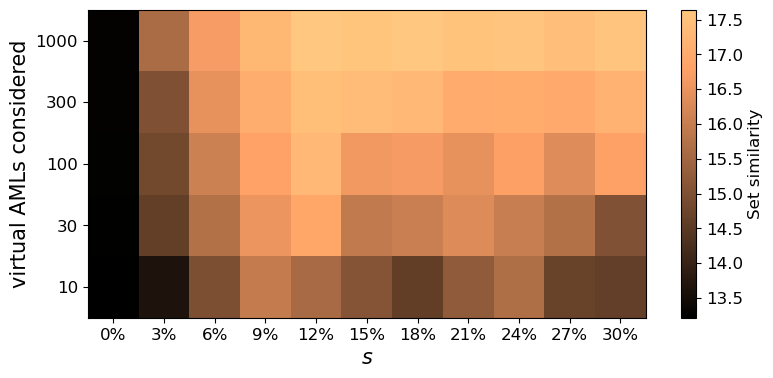

In [273]:
plt.clf()
plt.close('all')
f, ax = plt.subplots(1,1, figsize=(9,4))
font = {'weight' : 'normal','size'   : 12}
matplotlib.rc('font', **font)
f.subplots_adjust(wspace=0.4)

print(count_array)


c=ax.pcolormesh(x, y, count_array, cmap='copper')
# ax.set_title('Matching all cases (k=3)')
ax.set_xlabel('$s$', fontsize = 15)
ax.set_ylabel('virtual AMLs considered', fontsize = 15)
y_major_ticks = [1,2,3,4,5]
y_major_tick_labels = [10,30,100,300,1000]
x_major_ticks = [0,0.03,0.06,0.09,0.12,0.15,0.18, 0.21, 0.24, 0.27,0.30]
x_major_tick_labels = ["0%", "3%", "6%", "9%", "12%", "15%", "18%",  "21%", "24%", "27%",  "30%"]

ax.set_yticks(y_major_ticks)
ax.set_yticklabels(y_major_tick_labels)
ax.set_xticks(x_major_ticks)
ax.set_xticklabels(x_major_tick_labels)
# set the limits of the plot to the limits of the data
# ax.axis([x.min(), x.max(), y.min(), y.max()])
plt.colorbar(c, ax=ax, label= 'Set similarity')
#     plt.colorbar.ax.set_ylabel()

# plt.savefig('paper_schematics/set_similarity_across_different_num_virtual_AMLs_Poon_k4.pdf', bbox_inches = 'tight')


k=4

In [307]:
count_array = []
for params in list_of_params_labels[3::]:
    mu_direction = []
    for tree_no in [10,30,100,300,1000]:
        
#         print(mapping[(s)])
        
        dictionary_total_exp_val = dictionary_total_exp_val_by_tree_no[tree_no]
        entry = dictionary_total_exp_val[params]
        mu_direction.append(entry)
    count_array.append(mu_direction)

y, x = np.meshgrid([1,2,3,4,5], [0.09,0.12,0.15,0.18, 0.21, 0.24, 0.27,0.30])
print(count_array)

[[21.49060791667698, 21.58224159785266, 22.5319251567727, 22.820843874338927, 22.84597883259082], [19.91955959014643, 21.41828608917077, 21.475884109565786, 21.48819758094843, 23.244164428043433], [19.327571012030777, 19.85096100797605, 21.045019462538434, 21.490102248287215, 22.81325637418428], [18.976159899598223, 19.25494846180029, 21.02127729225611, 21.542361828476942, 21.74520322382048], [18.801393505623995, 20.636908087771143, 21.10153025469791, 21.223081586435477, 21.637658901317177], [19.34941934356469, 20.37237939697313, 20.998699226898502, 21.39228477208595, 21.694775161592595], [18.927803305831993, 20.20238995102308, 20.932644248885317, 21.52832721970765, 21.60748605509963], [20.385653100464076, 20.68606721770552, 20.769177297318596, 21.606787034249752, 21.78555002656104]]


[[21.49060791667698, 21.58224159785266, 22.5319251567727, 22.820843874338927, 22.84597883259082], [19.91955959014643, 21.41828608917077, 21.475884109565786, 21.48819758094843, 23.244164428043433], [19.327571012030777, 19.85096100797605, 21.045019462538434, 21.490102248287215, 22.81325637418428], [18.976159899598223, 19.25494846180029, 21.02127729225611, 21.542361828476942, 21.74520322382048], [18.801393505623995, 20.636908087771143, 21.10153025469791, 21.223081586435477, 21.637658901317177], [19.34941934356469, 20.37237939697313, 20.998699226898502, 21.39228477208595, 21.694775161592595], [18.927803305831993, 20.20238995102308, 20.932644248885317, 21.52832721970765, 21.60748605509963], [20.385653100464076, 20.68606721770552, 20.769177297318596, 21.606787034249752, 21.78555002656104]]


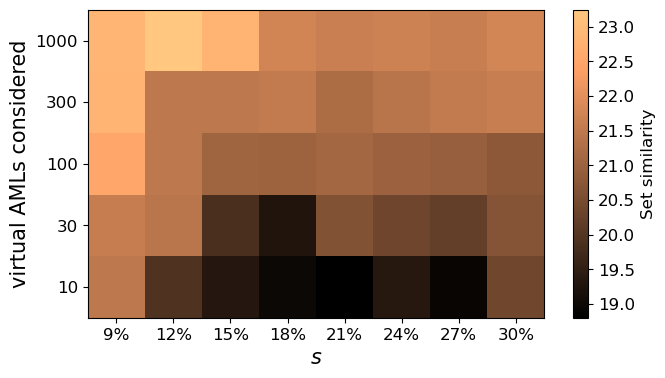

In [308]:
plt.clf()
plt.close('all')
f, ax = plt.subplots(1,1, figsize=(9/11*9,4))
font = {'weight' : 'normal','size'   : 12}
matplotlib.rc('font', **font)
f.subplots_adjust(wspace=0.4)

print(count_array)


c=ax.pcolormesh(x, y, count_array, cmap='copper')
# ax.set_title('Matching all cases (k=3)')
ax.set_xlabel('$s$', fontsize = 15)
ax.set_ylabel('virtual AMLs considered', fontsize = 15)
y_major_ticks = [1,2,3,4,5]
y_major_tick_labels = [10,30,100,300,1000]
x_major_ticks = [0.09,0.12,0.15,0.18, 0.21, 0.24, 0.27,0.30]
x_major_tick_labels = [ "9%", "12%", "15%", "18%",  "21%", "24%", "27%",  "30%"]

ax.set_yticks(y_major_ticks)
ax.set_yticklabels(y_major_tick_labels)
ax.set_xticks(x_major_ticks)
ax.set_xticklabels(x_major_tick_labels)
# set the limits of the plot to the limits of the data
# ax.axis([x.min(), x.max(), y.min(), y.max()])
plt.colorbar(c, ax=ax, label= 'Set similarity')
#     plt.colorbar.ax.set_ylabel()

# plt.savefig('paper_schematics/set_similarity_across_different_num_virtual_AMLs_Poon_k4.pdf', bbox_inches = 'tight')
